# IPL PREDICTION MODEL TRAINING AND TESTING

In this notebook im gonna attempt to build a model that is trained and tested on ipl 2024 batsmen stats and then tries to predict the runs scored by the same batsmen in ipl 2025

Since we  are predicting a number the type of problem is a Regression Problem

## Things that are going to be covered in this notebook

 * EDA
 * Data Preprocessing
 * Modelling
 * Scoring and Evaluation
 * Hyper-Parameter Tuning (if needed)
 * Final Views

In [2]:
##imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# EDA

In [4]:
data24=pd.read_csv("./data/Orange Cap 2024.csv")
data24.head(10)

,Player Name,Team Name,Total runs,Year,Matches Played,Innings,Not Outs,Highest Score,Average,Balls Faced,Strike Rate,0,50,100,4s,6s
0,V Kohli,RCB,741,2024,15,15,3,113*,61.75,479,154.69,0,5,1,62,38
1,RD Gaikwad,CSK,583,2024,14,14,3,108*,53.00,413,141.16,2,4,1,58,18
2,R Parag,RR,573,2024,16,14,3,84*,52.09,384,149.21,0,4,0,40,33
3,TM Head,SRH,567,2024,15,15,1,102,40.50,296,191.55,3,4,1,64,32
4,SV Samson,RR,531,2024,16,15,4,86,48.27,346,153.46,1,5,0,48,24
5,B Sai Sudharsan,GT,527,2024,12,12,1,103,47.90,373,141.28,0,2,1,48,16
6,KL Rahul,LSG,520,2024,14,14,0,82,37.14,382,136.12,0,4,0,45,19
7,N Pooran,LSG,499,2024,14,14,6,75,62.37,280,178.21,1,3,0,35,36
8,SP Narine,KKR,488,2024,15,14,0,109,34.85,270,180.74,1,3,1,50,33
9,Abhishek Sharma,SRH,484,2024,16,16,1,75*,32.26,237,204.21,0,3,0,36,42


In [6]:
data24.describe()

,Total runs,Year,Matches Played,Innings,Not Outs,Average,Balls Faced,Strike Rate,0,50,100,4s,6s
count,150.000000,150.0,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,164.206667,2024.0,9.486667,7.340000,1.526667,21.955333,108.773333,135.469733,0.580000,0.853333,0.093333,14.493333,8.400000
std,168.494132,0.0,4.811531,4.636925,1.709416,14.440259,105.719595,42.882385,0.735212,1.343074,0.314027,15.675718,9.779447
min,3.000000,2024.0,1.000000,1.000000,0.000000,0.000000,3.000000,33.330000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2024.0,5.000000,3.000000,0.000000,10.500000,17.250000,114.790000,0.000000,0.000000,0.000000,2.000000,1.000000
50%,110.000000,2024.0,10.000000,7.000000,1.000000,21.850000,72.500000,140.000000,0.000000,0.000000,0.000000,8.500000,5.000000
75%,253.750000,2024.0,14.000000,12.000000,2.000000,31.595000,178.750000,158.112500,1.000000,1.000000,0.000000,22.750000,13.000000
max,741.000000,2024.0,16.000000,16.000000,8.000000,62.370000,479.000000,300.000000,4.000000,5.000000,2.000000,64.000000,42.000000


In [7]:
data24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Player Name     150 non-null    object 
 1   Team Name       150 non-null    object 
 2   Total runs      150 non-null    int64  
 3   Year            150 non-null    int64  
 4   Matches Played  150 non-null    int64  
 5   Innings         150 non-null    int64  
 6   Not Outs        150 non-null    int64  
 7   Highest Score   150 non-null    object 
 8   Average         150 non-null    float64
 9   Balls Faced     150 non-null    int64  
 10  Strike Rate     150 non-null    float64
 11  0               150 non-null    int64  
 12  50              150 non-null    int64  
 13  100             150 non-null    int64  
 14  4s              150 non-null    int64  
 15  6s              150 non-null    int64  
dtypes: float64(2), int64(11), object(3)
memory usage: 18.9+ KB


In [8]:
data24.isna().sum()

Player Name       0
Team Name         0
Total runs        0
Year              0
Matches Played    0
Innings           0
Not Outs          0
Highest Score     0
Average           0
Balls Faced       0
Strike Rate       0
0                 0
50                0
100               0
4s                0
6s                0
dtype: int64

In [9]:
data24.shape

(150, 16)

<Axes: ylabel='Total runs'>

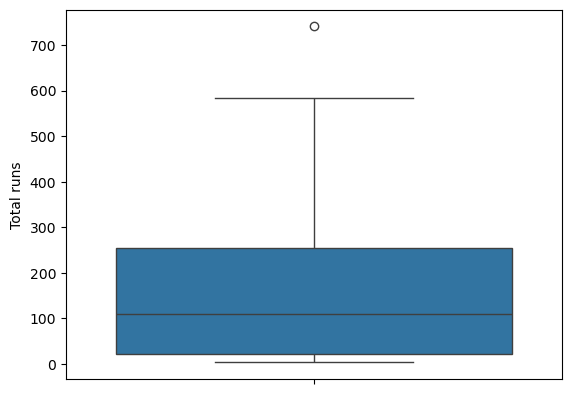

In [12]:
import seaborn as sns
## lets see if there are any outliers
sns.boxplot(data24["Total runs"])

In [13]:
## theres only one outlier so we'll let it be

In [22]:
numeric=data24.select_dtypes(include="number")
numeric.drop("Year",axis=1,inplace=True)
numeric

,Total runs,Matches Played,Innings,Not Outs,Average,Balls Faced,Strike Rate,0,50,100,4s,6s
0,741,15,15,3,61.75,479,154.69,0,5,1,62,38
1,583,14,14,3,53.00,413,141.16,2,4,1,58,18
2,573,16,14,3,52.09,384,149.21,0,4,0,40,33
3,567,15,15,1,40.50,296,191.55,3,4,1,64,32
4,531,16,15,4,48.27,346,153.46,1,5,0,48,24
...,...,...,...,...,...,...,...,...,...,...,...,...
145,3,4,1,1,0.00,6,50.00,0,0,0,0,0
146,3,4,1,1,0.00,3,100.00,0,0,0,0,0
147,3,2,2,0,1.50,9,33.33,1,0,0,0,0
148,3,10,2,1,3.00,9,33.33,0,0,0,0,0


<Axes: >

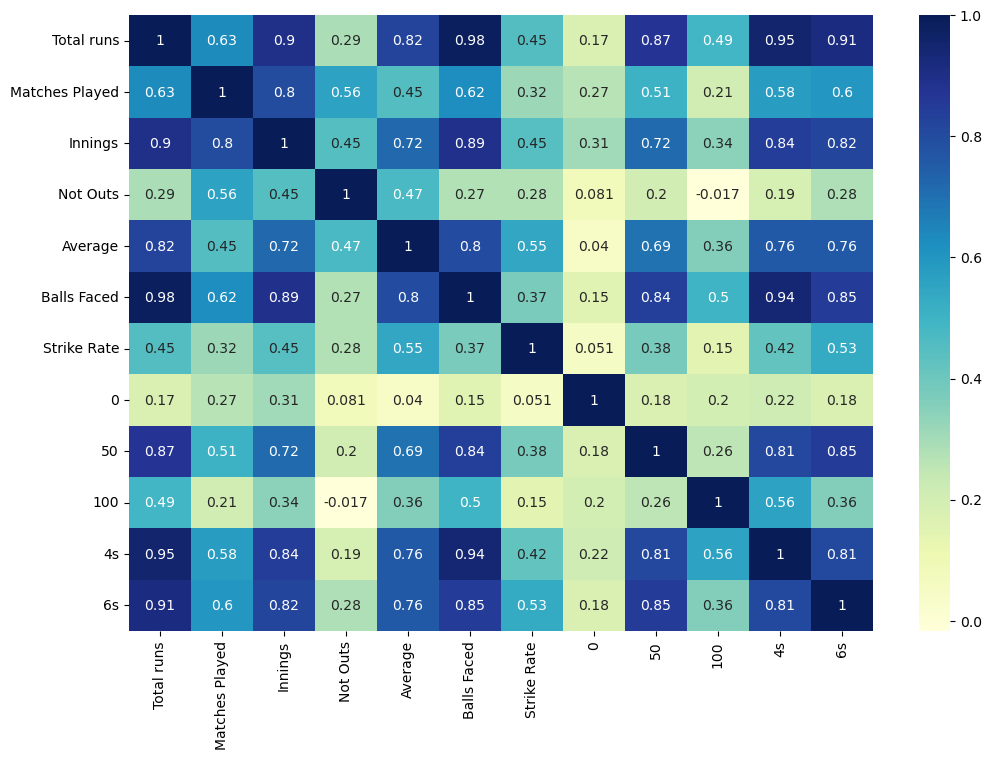

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(numeric.corr(),annot=True,cmap="YlGnBu")

[Text(0.5, 1.0, 'Strike Rate vs Runs scored by a batsman'),
 Text(0.5, 0, 'Strike Rate'),
 Text(0, 0.5, 'Runs scored')]

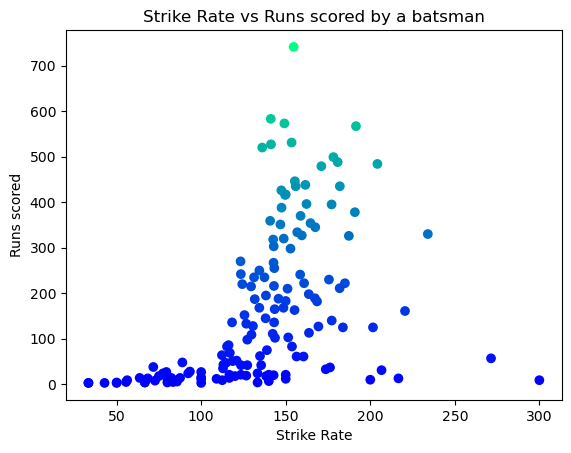

In [26]:
fig,ax=plt.subplots()
ax.scatter(data24["Strike Rate"],data24["Total runs"],c=data24["Total runs"],cmap="winter")
ax.set(title="Strike Rate vs Runs scored by a batsman",xlabel="Strike Rate",ylabel="Runs scored")

In [27]:
## we can see as strike rate goes up runs there are fewer runs scored

[Text(0.5, 1.0, 'No of Balls Faced vs Runs scored by a batsman'),
 Text(0.5, 0, 'No of Balls Faced'),
 Text(0, 0.5, 'Runs scored')]

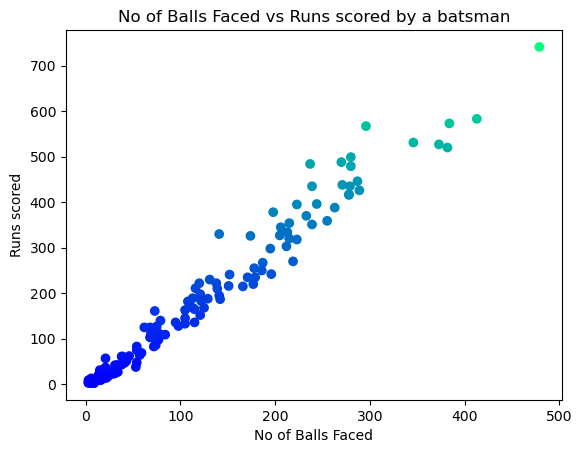

In [28]:
## lets see for the no of balls faced
fig,ax=plt.subplots()
ax.scatter(data24["Balls Faced"],data24["Total runs"],c=data24["Total runs"],cmap="winter")
ax.set(title="No of Balls Faced vs Runs scored by a batsman",xlabel="No of Balls Faced",ylabel="Runs scored")

In [29]:
## so obviously the more the balls faced the more the runs were scored

# Imports for the project

In [52]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Data Preprocessing

In [31]:
## lets see what data is what type
data24.dtypes

Player Name        object
Team Name          object
Total runs          int64
Year                int64
Matches Played      int64
Innings             int64
Not Outs            int64
Highest Score      object
Average           float64
Balls Faced         int64
Strike Rate       float64
0                   int64
50                  int64
100                 int64
4s                  int64
6s                  int64
dtype: object

In [78]:
# so we need to convert player name,team name to numeric data ,we'll do so using onehotencoder,pipeline and col transformer
# we dropped the highest score col as it doesnt make much diff and doesnt convert to numerical data
# data24.drop("0",axis=1,inplace=True)
cat_features=["Player Name","Team Name"]
cat_transformation=Pipeline(steps=[("imputer",SimpleImputer(strategy="constant",fill_value="missing")),("onehotencoder",OneHotEncoder(handle_unknown="ignore"))])
num_features=["Matches Played","Innings","Not Outs","Average","Balls Faced","Strike Rate","50","100","4s","6s"]
num_transformation=Pipeline(steps=[("Imputer",SimpleImputer(strategy="mean"))])
preprocessing=ColumnTransformer(transformers=[("cat",cat_transformation,cat_features),("num",num_transformation,num_features)])
pipeline=Pipeline(steps=[("preprocessing",preprocessing),("model",LinearRegression())])




# Data splitting and Fitting

In [79]:
np.random.seed(42)
X=data24.drop("Total runs",axis=1)
y=data24["Total runs"]
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)
pipeline.fit(Xtrain,ytrain)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Player Name', 'Team Name']),
                                                 ('num',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer())]),
                                                  ['Matches Played', 'Innings',
                                                   'Not Outs', 'Average',
                                                   'Balls Faced', 'Strike Rate',
                                                   '50', '100', '4s',
                                                   '6s'])])),
                ('model', LinearRegression())])

## Scoring/Evaluation (baseline)

In [80]:
pipeline.score(Xtest,ytest)

0.9987894712266291

In [81]:
r2=cross_val_score(pipeline,X,y,cv=5,scoring="r2")
r2

array([ 0.9828136 ,  0.94390476,  0.96593647,  0.82981507, -4.39023437])

In [82]:
## one really unlucky split , so we use Kfold to make the folds random
K=KFold(shuffle=True,random_state=42)
r2=cross_val_score(pipeline,X,y,cv=K,scoring="r2")
r2.mean()

np.float64(0.9980592399206574)

In [83]:
## mae
K=KFold(shuffle=True,random_state=42)
mae=cross_val_score(pipeline,X,y,cv=K,scoring="neg_mean_absolute_error")
mae.mean()

np.float64(-5.31304710929168)

# Exporting and Importing the model


In [91]:
import joblib
joblib.dump(pipeline,"pipeline.pkl")

['pipeline.pkl']

In [92]:
model=joblib.load("pipeline.pkl")

## Getting the 2025 dataset

In [98]:
data25=pd.read_csv("./data/IPL2025Batters.csv")
Xtest=data25.head()
data25.head()

,Player Name,Team,Runs,Matches,Inn,No,HS,AVG,BF,SR,100s,50s,4s,6s
0,Sai Sudharsan,GT,759,15,15,1,108*,54.21,486,156.17,1,6,88,21
1,Surya Kumar Yadav,MI,717,16,16,5,73*,65.18,427,167.91,0,5,69,38
2,Virat Kohli,RCB,657,15,15,3,73*,54.75,454,144.71,0,8,66,19
3,Shubman Gill,GT,650,15,15,2,93*,50.00,417,155.87,0,6,62,24
4,Mitchell Marsh,LSG,627,13,13,0,117,48.23,383,163.70,1,6,56,37


In [100]:
Xtest["Runs"]

0    759
1    717
2    657
3    650
4    627
Name: Runs, dtype: int64

In [69]:
data24.head()

,Player Name,Team Name,Total runs,Year,Matches Played,Innings,Not Outs,Average,Balls Faced,Strike Rate,0,50,100,4s,6s
0,V Kohli,RCB,741,2024,15,15,3,61.75,479,154.69,0,5,1,62,38
1,RD Gaikwad,CSK,583,2024,14,14,3,53.00,413,141.16,2,4,1,58,18
2,R Parag,RR,573,2024,16,14,3,52.09,384,149.21,0,4,0,40,33
3,TM Head,SRH,567,2024,15,15,1,40.50,296,191.55,3,4,1,64,32
4,SV Samson,RR,531,2024,16,15,4,48.27,346,153.46,1,5,0,48,24


In [61]:
# Select any 5 rows (let’s say from the top)
sample_2025 = data25.iloc[:5].copy()

X_sample = sample_2025.drop("Runs", axis=1)


In [62]:
X_sample

,Player Name,Team,Matches,Inn,No,HS,AVG,BF,SR,100s,50s,4s,6s
0,Sai Sudharsan,GT,15,15,1,108*,54.21,486,156.17,1,6,88,21
1,Surya Kumar Yadav,MI,16,16,5,73*,65.18,427,167.91,0,5,69,38
2,Virat Kohli,RCB,15,15,3,73*,54.75,454,144.71,0,8,66,19
3,Shubman Gill,GT,15,15,2,93*,50.00,417,155.87,0,6,62,24
4,Mitchell Marsh,LSG,13,13,0,117,48.23,383,163.70,1,6,56,37


In [70]:
X_sample = X_sample.rename(columns={
    "Matches": "Matches Played",
    "Inn": "Innings",
    "No": "Not Outs",
    "AVG": "Average",
    "BF": "Balls Faced",
    "SR": "Strike Rate",
    "Team": "Team Name"
})


In [71]:
X_sample

,Player Name,Team Name,Matches Played,Innings,Not Outs,HS,Average,Balls Faced,Strike Rate,100s,50s,4s,6s
0,Sai Sudharsan,GT,15,15,1,108*,54.21,486,156.17,1,6,88,21
1,Surya Kumar Yadav,MI,16,16,5,73*,65.18,427,167.91,0,5,69,38
2,Virat Kohli,RCB,15,15,3,73*,54.75,454,144.71,0,8,66,19
3,Shubman Gill,GT,15,15,2,93*,50.00,417,155.87,0,6,62,24
4,Mitchell Marsh,LSG,13,13,0,117,48.23,383,163.70,1,6,56,37


In [72]:
X_sample.drop("HS",axis=1,inplace=True)
X_sample

,Player Name,Team Name,Matches Played,Innings,Not Outs,Average,Balls Faced,Strike Rate,100s,50s,4s,6s
0,Sai Sudharsan,GT,15,15,1,54.21,486,156.17,1,6,88,21
1,Surya Kumar Yadav,MI,16,16,5,65.18,427,167.91,0,5,69,38
2,Virat Kohli,RCB,15,15,3,54.75,454,144.71,0,8,66,19
3,Shubman Gill,GT,15,15,2,50.00,417,155.87,0,6,62,24
4,Mitchell Marsh,LSG,13,13,0,48.23,383,163.70,1,6,56,37


In [73]:
data24.head()

,Player Name,Team Name,Total runs,Year,Matches Played,Innings,Not Outs,Average,Balls Faced,Strike Rate,0,50,100,4s,6s
0,V Kohli,RCB,741,2024,15,15,3,61.75,479,154.69,0,5,1,62,38
1,RD Gaikwad,CSK,583,2024,14,14,3,53.00,413,141.16,2,4,1,58,18
2,R Parag,RR,573,2024,16,14,3,52.09,384,149.21,0,4,0,40,33
3,TM Head,SRH,567,2024,15,15,1,40.50,296,191.55,3,4,1,64,32
4,SV Samson,RR,531,2024,16,15,4,48.27,346,153.46,1,5,0,48,24


In [84]:
X_sample.rename(columns={
    "100s": "100",
    "50s": "50"
}, inplace=True)


In [85]:
X_sample

,Player Name,Team Name,Matches Played,Innings,Not Outs,Average,Balls Faced,Strike Rate,100,50,4s,6s
0,Sai Sudharsan,GT,15,15,1,54.21,486,156.17,1,6,88,21
1,Surya Kumar Yadav,MI,16,16,5,65.18,427,167.91,0,5,69,38
2,Virat Kohli,RCB,15,15,3,54.75,454,144.71,0,8,66,19
3,Shubman Gill,GT,15,15,2,50.00,417,155.87,0,6,62,24
4,Mitchell Marsh,LSG,13,13,0,48.23,383,163.70,1,6,56,37


In [86]:
data24.head()

,Player Name,Team Name,Total runs,Year,Matches Played,Innings,Not Outs,Average,Balls Faced,Strike Rate,50,100,4s,6s
0,V Kohli,RCB,741,2024,15,15,3,61.75,479,154.69,5,1,62,38
1,RD Gaikwad,CSK,583,2024,14,14,3,53.00,413,141.16,4,1,58,18
2,R Parag,RR,573,2024,16,14,3,52.09,384,149.21,4,0,40,33
3,TM Head,SRH,567,2024,15,15,1,40.50,296,191.55,4,1,64,32
4,SV Samson,RR,531,2024,16,15,4,48.27,346,153.46,5,0,48,24


In [88]:
expected_cols = ["Player Name", "Team Name", "Matches Played", "Innings", "Not Outs", 
                 "Average", "Balls Faced", "Strike Rate",  "50", "100", "4s", "6s"]

X_sample = X_sample[expected_cols]


In [89]:
X_sample

,Player Name,Team Name,Matches Played,Innings,Not Outs,Average,Balls Faced,Strike Rate,50,100,4s,6s
0,Sai Sudharsan,GT,15,15,1,54.21,486,156.17,6,1,88,21
1,Surya Kumar Yadav,MI,16,16,5,65.18,427,167.91,5,0,69,38
2,Virat Kohli,RCB,15,15,3,54.75,454,144.71,8,0,66,19
3,Shubman Gill,GT,15,15,2,50.00,417,155.87,6,0,62,24
4,Mitchell Marsh,LSG,13,13,0,48.23,383,163.70,6,1,56,37


## Predicting the runs scored in 2025

In [97]:
ypreds=model.predict(X_sample)
ypreds

array([732.48710964, 711.83748989, 653.01121336, 644.19819178,
       637.04236314])

In [94]:
data25.head()

,Player Name,Team,Runs,Matches,Inn,No,HS,AVG,BF,SR,100s,50s,4s,6s
0,Sai Sudharsan,GT,759,15,15,1,108*,54.21,486,156.17,1,6,88,21
1,Surya Kumar Yadav,MI,717,16,16,5,73*,65.18,427,167.91,0,5,69,38
2,Virat Kohli,RCB,657,15,15,3,73*,54.75,454,144.71,0,8,66,19
3,Shubman Gill,GT,650,15,15,2,93*,50.00,417,155.87,0,6,62,24
4,Mitchell Marsh,LSG,627,13,13,0,117,48.23,383,163.70,1,6,56,37


In [101]:
from sklearn.metrics import r2_score
r2_score(Xtest["Runs"],ypreds)

0.9255998206810755

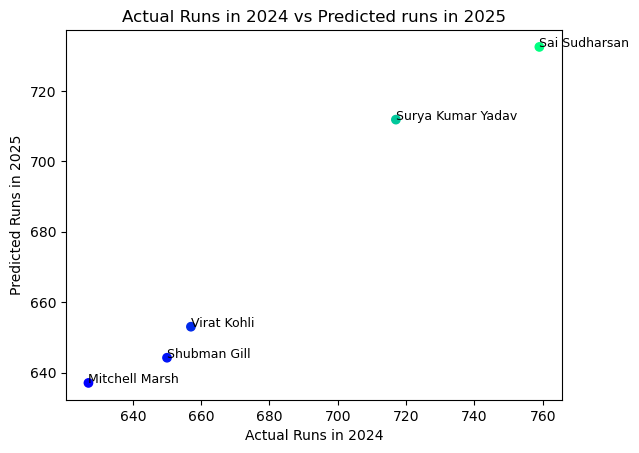

In [104]:
fig,ax=plt.subplots()
ax.scatter(Xtest["Runs"],ypreds,c=ypreds,cmap="winter")
ax.set(title="Actual Runs in 2024 vs Predicted runs in 2025",xlabel="Actual Runs in 2024",ylabel="Predicted Runs in 2025")
for i, name in enumerate(X_sample["Player Name"]):
    ax.annotate(name, (Xtest["Runs"].iloc[i], ypreds[i]), fontsize=9)



In [105]:
## the dots below diagonal show runs underestimated and above diagonal show runs overestimated

## Final Thoughts

Our model is fairly good at picking data from 2024 and using it to evaluate 2025's runs ,having a r2 score of 0.925